# Extract images from CSV after segmentation : data conversion & adapt for keras ImageDataGenerator

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

filepath = 'data_blocks/10000109_1_CTce_ThAb.csv'
BLOCK_SIZE = 33
prefix = 'patient_9'

In [22]:
data = pd.read_csv(filepath, dtype="int32") # keep full precision on loading

In [23]:
#Giving names to columns
cols = ['labels'] + [('pixel_' + str(i) )for i in range(1089)]
data.columns = cols
data.head()

,labels,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_1079,pixel_1080,pixel_1081,pixel_1082,pixel_1083,pixel_1084,pixel_1085,pixel_1086,pixel_1087,pixel_1088
0,0,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-1002,-1002,-1002,-1007,-1003,-996,-999,-1004,-1000,-1001
1,0,-996,-997,-991,-997,-997,-992,-995,-994,-998,...,-1000,-997,-994,-998,-998,-991,-997,-1001,-994,-996
2,0,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-999,-1005,-1003,-998,-1001,-998,-996,-999,-1002,-1002
3,0,-992,-998,-1008,-1007,-1003,-1003,-1003,-1005,-999,...,-1009,-1005,-1002,-1004,-1004,-1001,-1003,-1009,-1005,-1002
4,0,-987,-988,-990,-992,-992,-988,-986,-992,-998,...,-1001,-1006,-999,-989,-995,-996,-1003,-1000,-997,-999


In [24]:
#list of labels
labels = {
  0          :"background",
  1          :"body_envelope",
  2          :"thorax-abdomen",
  58         :"liver",
  86         :"spleen",
  170        :"pancreas",
  187        :"gallbladder",
  237        :"urinary_bladder",
  480        :"aorta",
  1247       :"trachea",
  1302       :"lung_right",
  1326       :"lung_left",
  2473       :"sternum",
  7578       :"thyroid_gland",
  29193      :"first_lumbar_vertebra",
  29662      :"kidney_right",
  29663      :"kidney_left",
  30324      :"adrenal_gland_rigth",
  30325      :"adrenal_gland_left",
  32248      :"psoas_major_right",
  32249      :"psoas_major_left",
  40357      :"muscle_body_of_right_rectus_abdominis",
  40358      :"muscle_body_of_left_rectus_abdominis",
}

# Create a list of unique values in df_y
existing_labels = list(data['labels'].unique())
existing_labels.sort()
print(existing_labels)

[0, 1, 2, 58, 86, 170, 187, 237, 480, 1247, 1302, 1326, 2473, 7578, 29193, 29662, 29663, 30324, 30325, 32248, 32249, 40357, 40358]


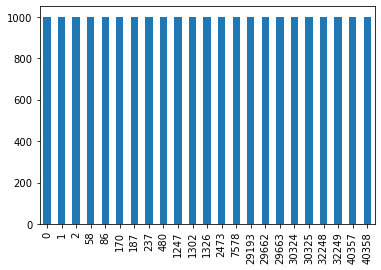

In [25]:
vc = data['labels'].value_counts().sort_index()
assert (vc.sum() == data.shape[0])
ax = vc.plot(kind='bar')
fig = ax.get_figure()
# we have the same amount of examples for each class

In [26]:
# Subsets creation
df_y = data.iloc[:, 0]
df_x = data.iloc[:, 1:]

## Ploting Data

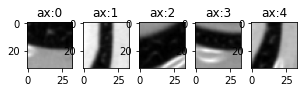

In [27]:
startIndex = 2000
number = 5

blocks = []

#convert dataframe to numpy array
for i in range(number):
  blocks.append(df_x.iloc[startIndex + i].to_numpy())
  blocks[i] = blocks[i].reshape(BLOCK_SIZE,BLOCK_SIZE)


fig=plt.figure(figsize=(BLOCK_SIZE, BLOCK_SIZE))
columns = number * BLOCK_SIZE

ax = []
for i in range(number):
    ax.append( fig.add_subplot(33, 33, i+1) )
    ax[-1].set_title("ax:"+str(i))  # set title
    plt.imshow(blocks[i], cmap="gray")
plt.show()

# Writing files

In [28]:
try:
  # Create dir for patient
  os.mkdir(prefix)   
except FileExistsError:
  print("Directory already exists")  


# Create sub-dir for classes
for key, val in labels.items():
  try:
    # Create dir for patient
    os.mkdir(prefix+"/"+val)
  except FileExistsError:
    print("Directory already exists")

In [29]:
#convert scanner relative value [-1024, 2976] to [0, 255] => 8 bits
converter = lambda t: (((t + 1024)/2000) * 255).astype(np.uint8)

In [30]:
### We want to write image files from the csv according to the class
#convert dataframe to numpy array
for i in range(df_x.shape[0]):
  block = df_x.iloc[i].to_numpy()
  block = block.reshape(BLOCK_SIZE,BLOCK_SIZE)
  block = converter(block)
  im = Image.fromarray(block)
  im.save(prefix +"/" + labels[df_y[i]] + "/" + prefix +"_" + str(i) + ".png")